<h1>All Respondents Analysis with Grades Final</h1>

<h2>Read All Respondents Data</h2>

In [2]:
import os
import pandas as pd

# Specify the folder path where the CSV files are located
folder_path = "../../all respondents data"

# Initialize an empty dataframe to store the combined data
combined_data = pd.DataFrame()

# Loop through each file in the folder with .csv extension and append to the combined_data dataframe
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path, low_memory=False)
        respondent_num = filename.split('_')[0]  # Get the first part of the filename before the first '_'
        df['Respondent'] = respondent_num  # Add a new column with the respondent number
        combined_data = pd.concat([combined_data, df])

columns_to_remove = ['Row','EventSource','SlideEvent','StimType','Duration',
                     'CollectionPhase','SourceStimuliName','EventSource','SampleNumber','EventSource.1',
                     'EventSource.2','Interocular Distance', 'Gaze X', 'Gaze Y', 'Interpolated Gaze X',
                    'Interpolated Gaze Y', 'Interpolated Distance', 'Fixation Index by Stimulus',
                    'Fixation X', 'Fixation Y', 'Fixation Start', 'Fixation End',
                    'Saccade Index by Stimulus', 'Saccade Start', 'Saccade End', 
                    'Fixation Index', 'Saccade Index']
combined_data.drop(columns_to_remove, axis=1, inplace=True)

combined_data.head()


,Timestamp,Anger,Contempt,Disgust,Fear,Joy,Sadness,Surprise,Engagement,Valence,...,Gaze Acceleration,Fixation Duration,Fixation Dispersion,Saccade Duration,Saccade Amplitude,Saccade Peak Velocity,Saccade Peak Acceleration,Saccade Peak Deceleration,Saccade Direction,Respondent
0,36101.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,001
1,36109.900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,118.037600,NaN,NaN,887.4785,49.147195,385.177405,9959.550382,-7885.240429,187.258369,001
2,36236.000,0.125566,0.186393,0.023706,0.125796,0.025453,0.125512,0.055428,0.328766,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,001
3,36269.000,0.125833,0.186909,0.023738,0.126169,0.025312,0.125694,0.055510,0.328766,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,001
4,36270.473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-199.723674,NaN,NaN,887.4785,49.147195,385.177405,9959.550382,-7885.240429,187.258369,001


In [3]:
print(combined_data)

          Timestamp     Anger  Contempt   Disgust      Fear       Joy  \
0         36101.200       NaN       NaN       NaN       NaN       NaN   
1         36109.900       NaN       NaN       NaN       NaN       NaN   
2         36236.000  0.125566  0.186393  0.023706  0.125796  0.025453   
3         36269.000  0.125833  0.186909  0.023738  0.126169  0.025312   
4         36270.473       NaN       NaN       NaN       NaN       NaN   
...             ...       ...       ...       ...       ...       ...   
148355  2522681.800       NaN       NaN       NaN       NaN       NaN   
148356  2522709.000  0.245047  0.204197  0.028027  0.133038  0.041089   
148357  2522709.800       NaN       NaN       NaN       NaN       NaN   
148358  2522831.900       NaN       NaN       NaN       NaN       NaN   
148359  2522831.900       NaN       NaN       NaN       NaN       NaN   

         Sadness  Surprise  Engagement  Valence  ...  Gaze Acceleration  \
0            NaN       NaN         NaN      NaN 

In [4]:
print(combined_data.columns)

Index(['Timestamp', 'Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness',
       'Surprise', 'Engagement', 'Valence', 'Sentimentality', 'Confusion',
       'Neutral', 'Attention', 'Brow Furrow', 'Brow Raise', 'Cheek Raise',
       'Chin Raise', 'Dimpler', 'Eye Closure', 'Eye Widen', 'Inner Brow Raise',
       'Jaw Drop', 'Lip Corner Depressor', 'Lip Press', 'Lip Pucker',
       'Lip Stretch', 'Lip Suck', 'Lid Tighten', 'Mouth Open', 'Nose Wrinkle',
       'Smile', 'Smirk', 'Upper Lip Raise', 'Blink', 'BlinkRate', 'Pitch',
       'Yaw', 'Roll', 'Gaze Velocity', 'Gaze Acceleration',
       'Fixation Duration', 'Fixation Dispersion', 'Saccade Duration',
       'Saccade Amplitude', 'Saccade Peak Velocity',
       'Saccade Peak Acceleration', 'Saccade Peak Deceleration',
       'Saccade Direction', 'Respondent'],
      dtype='object')


<h3>Merge Respondents Data with Grades Dataframe</h3>

In [5]:
import pandas as pd

# Read in the Grades.csv file
grades_df = pd.read_csv('../Grades.csv')

# Remove the trailing underscore from the "Respondent" column in the grades_df dataframe
grades_df['Respondent'] = grades_df['Respondent'].str.rstrip('_')

# Merge the combined_data and grades_df dataframes based on the "Respondent" column
combined_data_with_grades = pd.merge(combined_data, grades_df[['Respondent', 'Grade']], on='Respondent')

# Print the resulting dataframe with the added "Grade" column
print(combined_data_with_grades)


           Timestamp     Anger  Contempt   Disgust      Fear       Joy  \
0          36101.200       NaN       NaN       NaN       NaN       NaN   
1          36109.900       NaN       NaN       NaN       NaN       NaN   
2          36236.000  0.125566  0.186393  0.023706  0.125796  0.025453   
3          36269.000  0.125833  0.186909  0.023738  0.126169  0.025312   
4          36270.473       NaN       NaN       NaN       NaN       NaN   
...              ...       ...       ...       ...       ...       ...   
1379286  2522681.800       NaN       NaN       NaN       NaN       NaN   
1379287  2522709.000  0.245047  0.204197  0.028027  0.133038  0.041089   
1379288  2522709.800       NaN       NaN       NaN       NaN       NaN   
1379289  2522831.900       NaN       NaN       NaN       NaN       NaN   
1379290  2522831.900       NaN       NaN       NaN       NaN       NaN   

          Sadness  Surprise  Engagement  Valence  ...  Fixation Duration  \
0             NaN       NaN        

In [6]:
combined_data_with_grades.head()

,Timestamp,Anger,Contempt,Disgust,Fear,Joy,Sadness,Surprise,Engagement,Valence,...,Fixation Duration,Fixation Dispersion,Saccade Duration,Saccade Amplitude,Saccade Peak Velocity,Saccade Peak Acceleration,Saccade Peak Deceleration,Saccade Direction,Respondent,Grade
0,36101.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,001,100
1,36109.900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,887.4785,49.147195,385.177405,9959.550382,-7885.240429,187.258369,001,100
2,36236.000,0.125566,0.186393,0.023706,0.125796,0.025453,0.125512,0.055428,0.328766,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,001,100
3,36269.000,0.125833,0.186909,0.023738,0.126169,0.025312,0.125694,0.055510,0.328766,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,001,100
4,36270.473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,887.4785,49.147195,385.177405,9959.550382,-7885.240429,187.258369,001,100


<h2>Facial Expressions Analysis</h2>

<h3>Data Pre-processing</h3>

In [7]:
import pandas as pd

facial_expressions_columns = ['Timestamp', 'Respondent', 'Grade','Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise',
       'Engagement', 'Valence', 'Sentimentality', 'Confusion', 'Neutral',
       'Attention', 'Brow Furrow', 'Brow Raise', 'Cheek Raise', 'Chin Raise',
       'Dimpler', 'Eye Closure', 'Eye Widen', 'Inner Brow Raise', 'Jaw Drop',
       'Lip Corner Depressor', 'Lip Press', 'Lip Pucker', 'Lip Stretch',
       'Lip Suck', 'Lid Tighten', 'Mouth Open', 'Nose Wrinkle', 'Smile',
       'Smirk', 'Upper Lip Raise', 'Pitch', 'Yaw',
       'Roll']
# Creating a copy df with only the facial expressions data
facial_expressions_data = combined_data_with_grades.copy()

# Remove rows with all NaN values, except in the 'Respondent' column
facial_expressions_data = facial_expressions_data.dropna(how='all', 
                                                         subset=facial_expressions_data.columns.difference(['Respondent', 'Grade', 'Timestamp']))

facial_expressions_data



,Timestamp,Anger,Contempt,Disgust,Fear,Joy,Sadness,Surprise,Engagement,Valence,...,Fixation Duration,Fixation Dispersion,Saccade Duration,Saccade Amplitude,Saccade Peak Velocity,Saccade Peak Acceleration,Saccade Peak Deceleration,Saccade Direction,Respondent,Grade
1,36109.900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,887.4785,49.147195,385.177405,9959.550382,-7885.240429,187.258369,001,100
2,36236.000,0.125566,0.186393,0.023706,0.125796,0.025453,0.125512,0.055428,0.328766,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,001,100
3,36269.000,0.125833,0.186909,0.023738,0.126169,0.025312,0.125694,0.055510,0.328766,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,001,100
4,36270.473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,887.4785,49.147195,385.177405,9959.550382,-7885.240429,187.258369,001,100
5,36301.000,0.126258,0.187818,0.023798,0.126605,0.025114,0.125970,0.055607,0.328766,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,001,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379284,2522647.800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,129.0000,12.803555,181.233374,2839.826733,-2603.628571,72.946201,019,55
1379285,2522681.000,0.195341,0.187637,0.027562,0.130503,0.043328,0.117269,0.057809,0.328766,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,019,55
1379286,2522681.800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,019,55
1379287,2522709.000,0.245047,0.204197,0.028027,0.133038,0.041089,0.118906,0.057576,0.328766,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,019,55


<h2>Compare Facial Expressions by Grade Group</h2>

In [8]:

from tabulate import tabulate

# Add a new column to the combined_data_with_grades dataframe that indicates whether the grade is above or below 55
facial_expressions_data['Grade Group'] = facial_expressions_data['Grade'].apply(lambda x: 'Above 55' if x > 55 else 'Below 55')

# Describe statistics for each selected column by grade group
selected_columns = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise',
       'Engagement', 'Valence', 'Sentimentality', 'Confusion', 'Neutral',
       'Attention', 'Brow Furrow', 'Brow Raise', 'Cheek Raise', 'Chin Raise',
       'Dimpler', 'Eye Closure', 'Eye Widen', 'Inner Brow Raise', 'Jaw Drop',
       'Lip Corner Depressor', 'Lip Press', 'Lip Pucker', 'Lip Stretch',
       'Lip Suck', 'Lid Tighten', 'Mouth Open', 'Nose Wrinkle', 'Smile',
       'Smirk', 'Upper Lip Raise', 'Pitch', 'Yaw',
       'Roll']


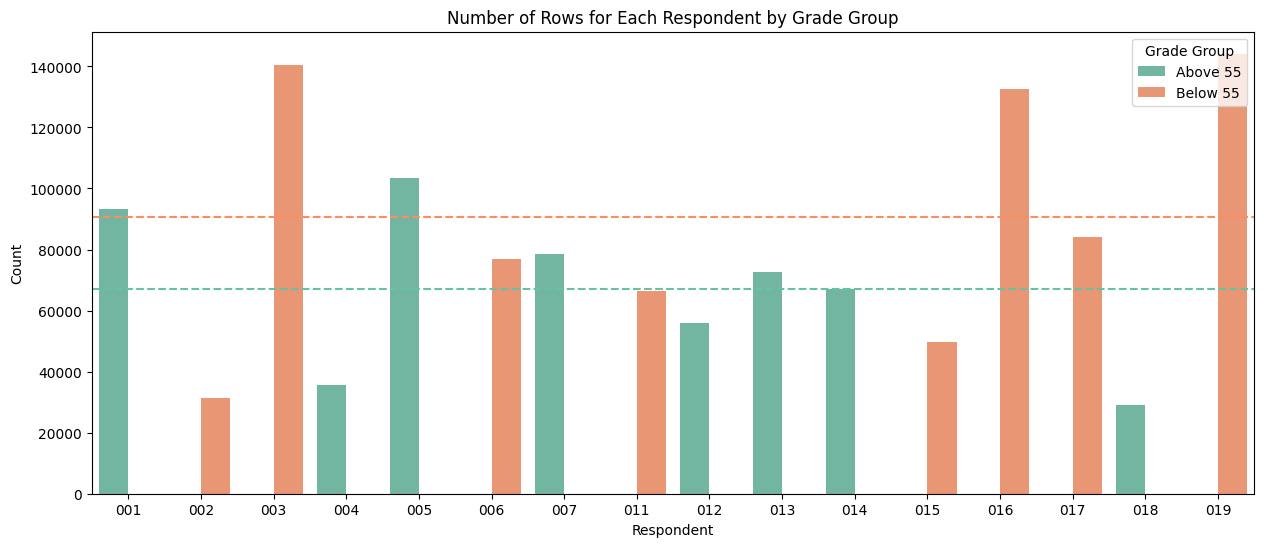

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6)) 

# Use seaborn's countplot to visualize the count of rows for each respondent
ax = sns.countplot(data=facial_expressions_data, x='Respondent', hue='Grade Group', palette='Set2')

plt.title('Number of Rows for Each Respondent by Grade Group')
plt.xlabel('Respondent')
plt.ylabel('Count')
plt.legend(title='Grade Group', loc='upper right')

# Calculate mean count for each 'Respondent'
mean_counts = facial_expressions_data.groupby('Respondent')['Grade Group'].count()

# Plot horizontal lines for mean count in each grade group
above_55_color = sns.color_palette('Set2')[0]
below_55_color = sns.color_palette('Set2')[1]

for grade_group, color in zip(['Above 55', 'Below 55'], [above_55_color, below_55_color]):
    mean_count_group = mean_counts[mean_counts.index.isin(facial_expressions_data[facial_expressions_data['Grade Group'] == grade_group]['Respondent'])].mean()
    plt.axhline(y=mean_count_group, linestyle='--', label=f'Mean Count ({grade_group})', color=color)

plt.show()


<h2>Correlation Between Emotions and Grade</h2>

In [10]:
facial_expressions_data.head()
facial_expressions_data.to_csv('./facial_expressions_with_grade_groups_with_eye_tracking_march_2024.csv')

<h3>Aggregate to 30 seconds time slots</h3>

In [29]:
import pandas as pd

def count_above_threshold(df, column_name, threshold):
    return (df[df[column_name].gt(threshold)]
                         .groupby(['Respondent', pd.Grouper(freq='30S')])
                         [column_name + ' above threshold']
                         .nunique())


# Read the CSV file into a DataFrame
file_path = './facial_expressions_with_grade_groups_with_eye_tracking_march_2024.csv'
df = pd.read_csv(file_path)

# Initialize an empty DataFrame
df_resampled = pd.DataFrame(columns=['Respondent', 'Timestamp'])

# Thresholds
fixation_duration_threshold = 200  
saccade_duration_threshold = 30

# Exclude specified columns
exclude_columns = ['Grade', 'Grade Group', 'Respondent', 'Timestamp', 'Blink', 'Unnamed: 0']
selected_columns = [col for col in df.columns if col not in exclude_columns]

# Convert 'Timestamp' to datetime format (assuming 'Timestamp' is in milliseconds)
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='ms')

# Set 'Timestamp' as the index
df.set_index('Timestamp', inplace=True)

agg_functions = ['mean', 'std', 'max', 'min']

# Group by 'Respondent' and resample every 30 seconds
for col in selected_columns:
    # Aggregate the current column and merge with the existing results
    col_resampled = df.groupby(['Respondent', pd.Grouper(freq='30S')])[col].agg(agg_functions).reset_index()
    
    # Use list comprehension to create new column names:
    new_col_names = [f"{col}_{stat}" for stat in agg_functions]
    
    # Assign the new names to the resampled DataFrame columns:
    # print(new_col_names)
    # col_resampled.columns = new_col_names
    df_resampled = pd.merge(df_resampled, col_resampled, how='outer', on=['Respondent', 'Timestamp'])

# Count long fixations and saccades    
threshold_count_fixation_duration = count_above_threshold(df, 'Fixation Duration', fixation_duration_threshold)
threshold_count_saccade_duration = count_above_threshold(df, 'Saccade Duration', saccade_duration_threshold)

# Merge the count above threshold with the main DataFrame
df_resampled = pd.merge(df_resampled, threshold_count_fixation_duration, how='outer', on=['Respondent', 
                                                                                          'Timestamp'])
df_resampled = pd.merge(df_resampled, threshold_count_saccade_duration, how='outer', on=['Respondent', 
                                                                                         'Timestamp'])
# Define aggregation function for Blink
agg_function_specific_column = lambda x: x.mode().iloc[0] if not x.mode().empty else 0

# Aggregate Blink and merge with the existing results
blink_resampled = df.groupby(['Respondent', pd.Grouper(freq='30S')])['Blink'].agg(agg_function_specific_column).reset_index()
blink_resampled.columns = ['Blink_mode']  # Rename column for clarity

df_resampled = pd.merge(df_resampled, blink_resampled, how='outer', on=['Respondent', 'Timestamp'])

# Classify 'Gaze Velocity' into classes within each 30-second interval
# gaze_velocity_bins = [-float('inf'), 30, 100, float('inf')]
# gaze_velocity_labels = ['Pursuit', 'Fixation', 'Saccade']
# df_resampled['Gaze Velocity Class'] = pd.cut(df_resampled['Gaze Velocity'], bins=gaze_velocity_bins, 
#                                              labels=gaze_velocity_labels)

# Display the resulting DataFrame
print(df_resampled)


C:\Users\user\AppData\Local\Temp\ipykernel_39908\2261975997.py:44: FutureWarning: Passing 'suffixes' which cause duplicate columns {'mean_x', 'std_x', 'max_x', 'min_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_resampled = pd.merge(df_resampled, col_resampled, how='outer', on=['Respondent', 'Timestamp'])
C:\Users\user\AppData\Local\Temp\ipykernel_39908\2261975997.py:44: FutureWarning: Passing 'suffixes' which cause duplicate columns {'mean_x', 'std_x', 'max_x', 'min_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_resampled = pd.merge(df_resampled, col_resampled, how='outer', on=['Respondent', 'Timestamp'])
C:\Users\user\AppData\Local\Temp\ipykernel_39908\2261975997.py:44: FutureWarning: Passing 'suffixes' which cause duplicate columns {'mean_x', 'std_x', 'max_x', 'min_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_resampled = pd.merge(df_resampled, col_resampled, how='ou

KeyError: 'Column not found: Fixation Durationabove threshold'

<h3>Compare the Grade Groups</h3>

<h5>Using non-parametric statistical test, since the data distribution is not normal. Only Pitch seems to have normal distribution. Since the data is not ordered, since those are measures at different timestamps and therefore have no order, chose to use Wilcoxon statistical test</h6>

In [12]:
import pandas as pd
from scipy.stats import wilcoxon
import matplotlib.pyplot as plt

selected_columns = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness',
       'Surprise', 'Engagement', 'Valence', 'Sentimentality', 'Confusion',
       'Neutral', 'Attention', 'Brow Furrow', 'Brow Raise', 'Cheek Raise',
       'Chin Raise', 'Dimpler', 'Eye Closure', 'Eye Widen', 'Inner Brow Raise',
       'Jaw Drop', 'Lip Corner Depressor', 'Lip Press', 'Lip Pucker',
       'Lip Stretch', 'Lip Suck', 'Lid Tighten', 'Mouth Open', 'Nose Wrinkle',
       'Smile', 'Smirk', 'Upper Lip Raise', 'Blink', 'BlinkRate', 'Pitch',
       'Yaw', 'Roll', 'Gaze Velocity', 'Gaze Acceleration',
       'Fixation Duration', 'Fixation Dispersion', 'Saccade Duration',
       'Saccade Amplitude', 'Saccade Peak Velocity',
       'Saccade Peak Acceleration', 'Saccade Peak Deceleration',
       'Saccade Direction']

# Group data by grade and respondent ID
grouped_data = facial_expressions_data.groupby(["Grade Group", "Respondent"])

# Define a function to select random samples per respondent and specified columns
def select_random_samples(group, columns, num_samples):
    return group[columns].sample(num_samples, replace=True) 

# Create empty lists to store individual respondent data for each column
above_55_data = {col: [] for col in selected_columns}
below_55_data = {col: [] for col in selected_columns}

# Loop through each grade and respondent group and collect random samples for specified columns
for (grade, respondent_id), group in grouped_data:
    for col in selected_columns:
        selected_samples = select_random_samples(group, [col], 10000)[col].tolist()
        if grade == "Above 55":
            above_55_data[col].extend(selected_samples)
        else:
            below_55_data[col].extend(selected_samples)

# Perform the Wilcoxon signed-rank test for each column
for col in selected_columns:
    test_result = wilcoxon(above_55_data[col], below_55_data[col])
    print(f"\nWilcoxon signed-rank test for column {col}:")
    print("Test statistic:", test_result.statistic)
    print("p-value:", test_result.pvalue)



Wilcoxon signed-rank test for column Anger:
Test statistic: nan
p-value: nan

Wilcoxon signed-rank test for column Contempt:
Test statistic: nan
p-value: nan

Wilcoxon signed-rank test for column Disgust:
Test statistic: nan
p-value: nan

Wilcoxon signed-rank test for column Fear:
Test statistic: nan
p-value: nan

Wilcoxon signed-rank test for column Joy:
Test statistic: nan
p-value: nan

Wilcoxon signed-rank test for column Sadness:
Test statistic: nan
p-value: nan

Wilcoxon signed-rank test for column Surprise:
Test statistic: nan
p-value: nan

Wilcoxon signed-rank test for column Engagement:
Test statistic: nan
p-value: nan

Wilcoxon signed-rank test for column Valence:
Test statistic: nan
p-value: nan

Wilcoxon signed-rank test for column Sentimentality:
Test statistic: nan
p-value: nan

Wilcoxon signed-rank test for column Confusion:
Test statistic: nan
p-value: nan

Wilcoxon signed-rank test for column Neutral:
Test statistic: nan
p-value: nan

Wilcoxon signed-rank test for colu

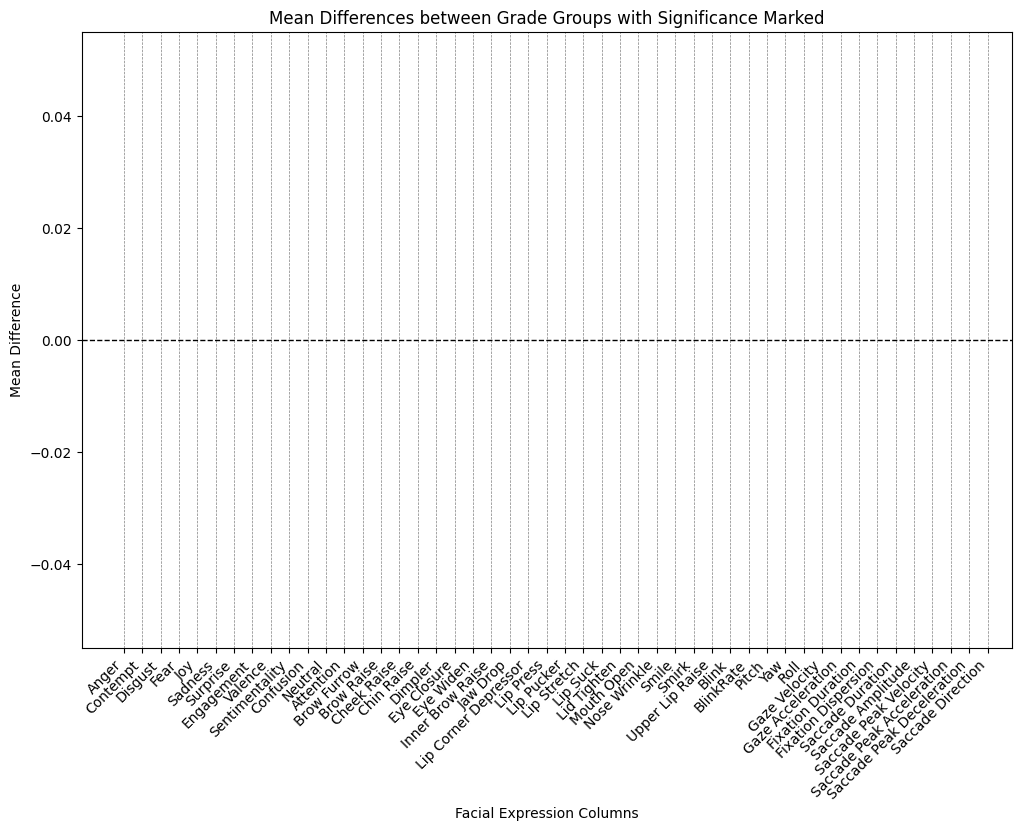

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import wilcoxon

# Perform the Wilcoxon signed-rank test for each column and store p-values and mean differences
p_values = []
mean_diffs = []
for col in selected_columns:
    test_result = wilcoxon(above_55_data[col], below_55_data[col])
    p_values.append(test_result.pvalue)
    mean_diff = np.mean(above_55_data[col]) - np.mean(below_55_data[col])
    mean_diffs.append(mean_diff)

# Create a bar plot for mean differences with vertical lines for significance
plt.figure(figsize=(12, 8))
bars = plt.bar(selected_columns, mean_diffs, yerr=None, capsize=5, color='red', alpha=0.7)

# Mark bars where p-value is below 0.05
for i, bar in enumerate(bars):
    plt.axvline(x=i, color='gray', linestyle='--', linewidth=0.5)
    if p_values[i] < 0.05:
        bar.set_color('green')


plt.axhline(0, color='black', linestyle='--', linewidth=1)   # Add a horizontal line at y=0 for reference

plt.xlabel('Facial Expression Columns')
plt.ylabel('Mean Difference')
plt.title('Mean Differences between Grade Groups with Significance Marked')
plt.xticks(rotation=45, ha='right')
plt.show()


<h6>Disgust and Smirk are the only features who are not significantly different</h6>

<h2>Grade Classifier</h2>

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd


selected_features = ['Brow Furrow', 'Brow Raise', 'Chin Raise', 'Eye Closure', 'Eye Widen', 'Inner Brow Raise', 
                     'Jaw Drop', 'Lip Corner Depressor', 'Lip Pucker', 'Lip Stretch', 'Lip Suck', 'Lid Tighten', 
                     'Mouth Open', 'Nose Wrinkle', 'Smile', 'Upper Lip Raise', 'Pitch', 'Yaw', 'Roll']

dataset = facial_expressions_data[selected_features + ['Respondent'] + ['Grade Group']]

# Identify the unique respondent IDs
respondent_ids = dataset['Respondent'].unique()

# Set the number of samples to select for each participant in the training set
num_samples_per_participant_train = 10000

# Set the number of participants for validation
num_participants_validation = 5

# Randomly select 11 participants for training
train_participants, validation_participants = train_test_split(respondent_ids, 
                                                               test_size=num_participants_validation, 
                                                               random_state=42)

# Create an empty DataFrame to store the selected training samples
selected_training_samples = pd.DataFrame(columns=dataset.columns)

# Randomly select samples for each participant in the training set
for participant_id in train_participants:
    participant_data = dataset[dataset['Respondent'] == participant_id]
    selected_training_samples = selected_training_samples.append(participant_data.sample(n=num_samples_per_participant_train, 
                                                                                         random_state=42))

# Create training set using the selected training samples
train_set = selected_training_samples

# Create validation set using all rows for the randomly selected 5 participants
validation_set = dataset[dataset['Respondent'].isin(validation_participants)]

# X_train = train_set.drop('Respondent', axis=1)
X_train = train_set.drop(['Respondent', 'Grade Group'], axis=1)
y_train = train_set['Grade Group']

X_validation = validation_set.drop(['Grade Group', 'Respondent'], axis=1)
y_validation = validation_set['Grade Group']

# Create and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the validation set
predictions = rf_classifier.predict(X_validation)

# Evaluate the model on the validation set
accuracy = accuracy_score(y_validation, predictions)
print(f"Accuracy on the validation set: {accuracy}")
print("Accuracy:", accuracy_score(y_validation, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_validation, predictions))
print("Classification Report:\n", classification_report(y_validation, predictions))


C:\Users\user\AppData\Local\Temp\ipykernel_64816\2396359115.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected_training_samples = selected_training_samples.append(participant_data.sample(n=num_samples_per_participant_train,
C:\Users\user\AppData\Local\Temp\ipykernel_64816\2396359115.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected_training_samples = selected_training_samples.append(participant_data.sample(n=num_samples_per_participant_train,
C:\Users\user\AppData\Local\Temp\ipykernel_64816\2396359115.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected_training_samples = selected_training_samples.append(participant_data.sample(n=num_samples_per_participant_train,
C:\Users\user\AppData\Local\

Accuracy on the validation set: 0.393941392666205
Accuracy: 0.393941392666205
Confusion Matrix:
 [[ 67476  26434]
 [138960  40031]]
Classification Report:
               precision    recall  f1-score   support

    Above 55       0.33      0.72      0.45     93910
    Below 55       0.60      0.22      0.33    178991

    accuracy                           0.39    272901
   macro avg       0.46      0.47      0.39    272901
weighted avg       0.51      0.39      0.37    272901



        Brow Furrow  Brow Raise  Chin Raise  Eye Closure  Eye Widen  \
633612     1.013889    0.415851    0.007838     0.000406   0.679284   
632471     0.591744    0.073888    0.010109     0.014184   0.018143   
629980     1.394691    0.031770    0.592584     0.064914   0.001308   
624992     0.107483    0.215510    0.001913     0.000115   1.569951   
632644     2.993669    0.046744    0.760667     0.003101   0.024018   
...             ...         ...         ...          ...        ...   
387385    38.752857   12.178674    0.000831     0.001828   5.952065   
347471     0.024385   26.705410    0.000956     0.005609   0.380146   
338382     0.303382    0.063372    0.002997     0.000163  37.873890   
337662     0.163616    0.103521    0.000084     0.936027   0.007820   
365485     0.025629    0.438041    0.000050     0.000008   7.920352   

        Inner Brow Raise   Jaw Drop  Lip Corner Depressor    Lip Pucker  \
633612          0.440412  76.264839          1.408656e-05  6.136163e-01 

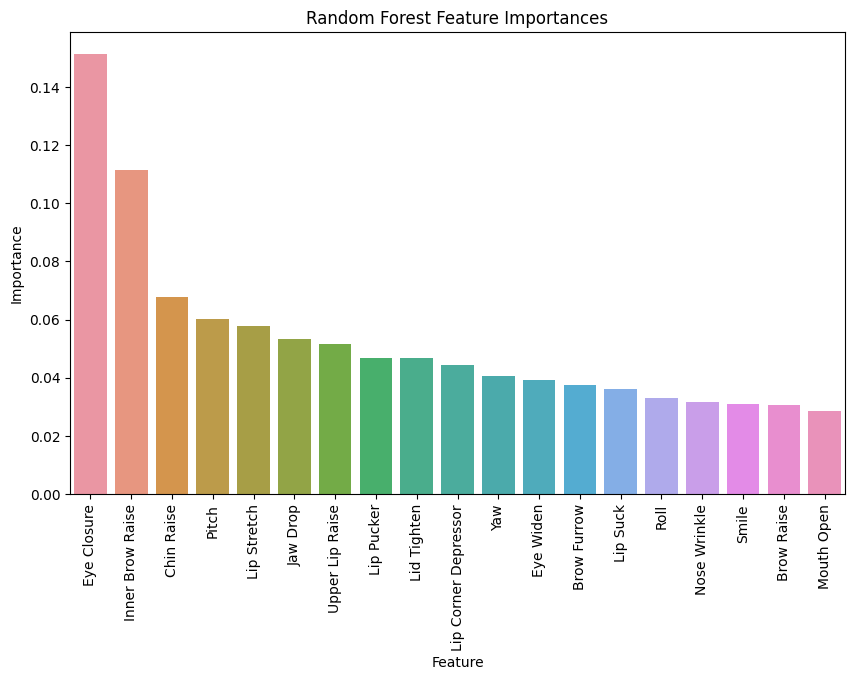

In [41]:
print(X_train)

# Get the feature importances
importances = rf_classifier.feature_importances_
features = X_train.columns

# Sort the importances in descending order
sorted_importances = sorted(zip(importances, features), reverse=True)

# Extract the sorted feature importances and feature names
sorted_feature_importances = [x[0] for x in sorted_importances]
sorted_feature_names = [x[1] for x in sorted_importances]

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_feature_names, y=sorted_feature_importances)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importances')
plt.show()

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd


selected_features = ['Jaw Drop', 'Lip Corner Depressor', 'Lip Suck','Lip Stretch', 'Nose Wrinkle', 'Yaw']

dataset = facial_expressions_data[selected_features + ['Respondent'] + ['Grade Group']]

# Identify the unique respondent IDs
respondent_ids = dataset['Respondent'].unique()

# Set the number of samples to select for each participant in the training set
num_samples_per_participant_train = 10000

# Set the number of participants for validation
num_participants_validation = 5

# Randomly select 11 participants for training
train_participants, validation_participants = train_test_split(respondent_ids, 
                                                               test_size=num_participants_validation, 
                                                               random_state=42)

# Create an empty DataFrame to store the selected training samples
selected_training_samples = pd.DataFrame(columns=dataset.columns)

# Randomly select samples for each participant in the training set
for participant_id in train_participants:
    participant_data = dataset[dataset['Respondent'] == participant_id]
    selected_training_samples = selected_training_samples.append(participant_data.sample(n=num_samples_per_participant_train, 
                                                                                         random_state=42))

# Create training set using the selected training samples
train_set = selected_training_samples

# Create validation set using all rows for the randomly selected 5 participants
validation_set = dataset[dataset['Respondent'].isin(validation_participants)]

# X_train = train_set.drop('Respondent', axis=1)
X_train = train_set.drop(['Respondent', 'Grade Group'], axis=1)
y_train = train_set['Grade Group']

X_validation = validation_set.drop(['Grade Group', 'Respondent'], axis=1)
y_validation = validation_set['Grade Group']

# Create and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the validation set
predictions = rf_classifier.predict(X_validation)

# Evaluate the model on the validation set
accuracy = accuracy_score(y_validation, predictions)
print(f"Accuracy on the validation set: {accuracy}")
print("Accuracy:", accuracy_score(y_validation, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_validation, predictions))
print("Classification Report:\n", classification_report(y_validation, predictions))


C:\Users\user\AppData\Local\Temp\ipykernel_64816\1189688582.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected_training_samples = selected_training_samples.append(participant_data.sample(n=num_samples_per_participant_train,
C:\Users\user\AppData\Local\Temp\ipykernel_64816\1189688582.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected_training_samples = selected_training_samples.append(participant_data.sample(n=num_samples_per_participant_train,
C:\Users\user\AppData\Local\Temp\ipykernel_64816\1189688582.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected_training_samples = selected_training_samples.append(participant_data.sample(n=num_samples_per_participant_train,
C:\Users\user\AppData\Local\

Accuracy on the validation set: 0.44844833840843384
Accuracy: 0.44844833840843384
Confusion Matrix:
 [[ 71901  22009]
 [128510  50481]]
Classification Report:
               precision    recall  f1-score   support

    Above 55       0.36      0.77      0.49     93910
    Below 55       0.70      0.28      0.40    178991

    accuracy                           0.45    272901
   macro avg       0.53      0.52      0.45    272901
weighted avg       0.58      0.45      0.43    272901



         Jaw Drop  Lip Corner Depressor  Lip Suck  Lip Stretch  Nose Wrinkle  \
633612  76.264839          1.408656e-05  0.005071     0.000273      0.015518   
632471   4.667243          4.121021e-06  0.001966     0.000171      0.070857   
629980   2.645183          2.004447e-04  0.120612     0.004736      0.139656   
624992  97.005791          6.889024e-06  0.007834     0.000007      0.054014   
632644   0.099065          1.778799e-02  0.006849     0.002394      0.049758   
...           ...                   ...       ...          ...           ...   
387385   2.966486          6.414495e-06  0.000196     0.005480      1.601904   
347471  57.862167          2.873077e-05  0.000420     0.001776      5.013321   
338382   8.082851          8.544552e-06  0.000297     0.003784      2.988857   
337662  62.965706          1.001352e-07  0.000039     0.001170      0.265177   
365485  22.897467          8.414196e-07  0.000018     0.000024      0.481600   

              Yaw  
633612   1.181429  

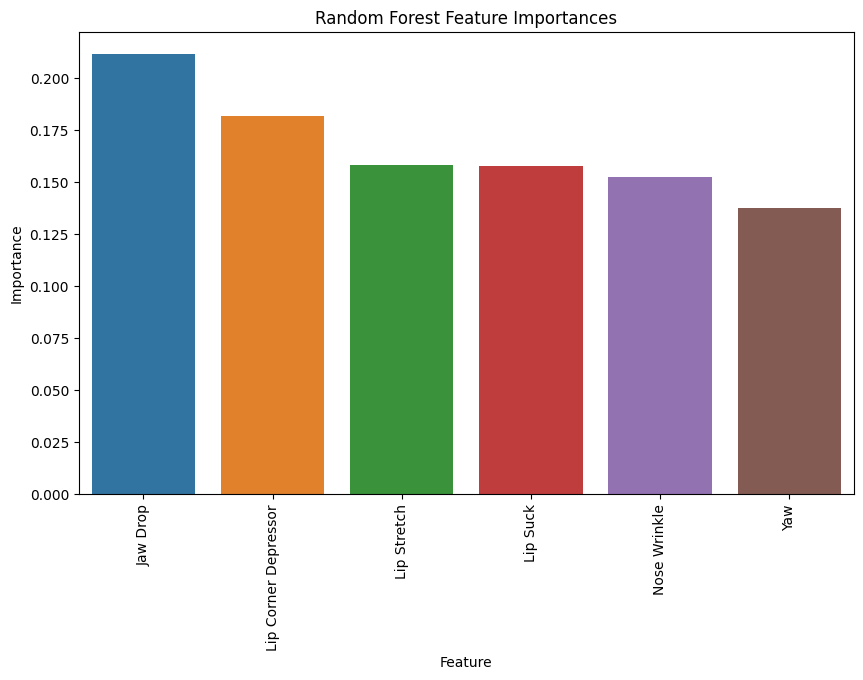

In [45]:
print(X_train)

# Get the feature importances
importances = rf_classifier.feature_importances_
features = X_train.columns

# Sort the importances in descending order
sorted_importances = sorted(zip(importances, features), reverse=True)

# Extract the sorted feature importances and feature names
sorted_feature_importances = [x[0] for x in sorted_importances]
sorted_feature_names = [x[1] for x in sorted_importances]

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_feature_names, y=sorted_feature_importances)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importances')
plt.show()